(<matplotlib.image.AxesImage at 0x263936adf10>,
 Text(0.5, 1.0, 'Circular Convolution'))

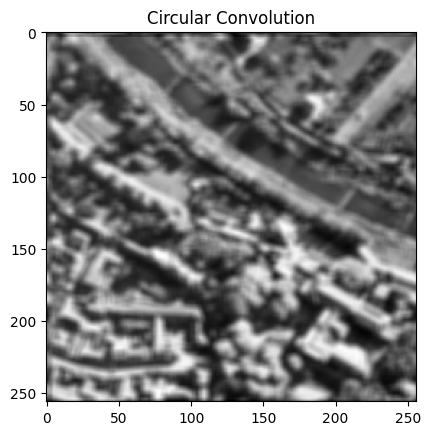

In [58]:
import numpy as np
import cv2
from scipy.fft import fft2, ifft2, fftshift, ifftshift

def circular_convolution(img, kernel):
    # Perform FFT on the image and kernel
    img_fft = fft2(img)
    kernel_fft = fft2(kernel, s=img.shape)

    # Perform circular convolution in the frequency domain
    result_fft = img_fft * kernel_fft

    # Perform IFFT to obtain the circular convolution result
    result = ifft2(result_fft)

    # Shift the result to the original position
#     result = ifftshift(result)

    # Take the real part of the result (discard the imaginary part)
    result = np.real(result)

    return result

# Load an image (replace 'input_image.jpg' with your image file)
img = aerial

# Define an averaging filter of size 5x5
kernel_size = 5
kernel = np.ones((kernel_size, kernel_size), dtype=np.float32) / (kernel_size * kernel_size)

# Perform circular convolution
result = circular_convolution(img, kernel)

# Display the original image and the result
plt.imshow(kernel, cmap='gray'), plt.title('Averaging Filter')
plt.imshow(result, cmap='gray'), plt.title('Circular Convolution')

In [37]:
print(result)

[[162.31999199 156.8799915  150.67999115 ... 167.47999095 168.03999157
  166.79999191]
 [179.43999169 173.83999132 165.75999103 ... 176.27999037 179.79999102
  181.15999148]
 [195.7599906  189.95999043 181.87999021 ... 184.15998938 190.71999007
  194.87999048]
 ...
 [137.2799897  138.439989   139.51998857 ... 131.59999089 133.95999088
  136.55999038]
 [142.15999047 142.83998978 142.99998921 ... 138.43999086 140.19999109
  142.31999088]
 [148.55999147 146.39999092 144.59999022 ... 153.79999112 152.9199916
  151.87999159]]


In [53]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
aerial = mpimg.imread("C:/Users/kamuj/Downloads/ivp/ivp assignment2/5.1.10.tiff")

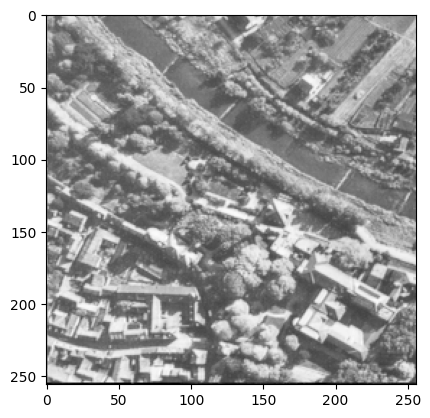

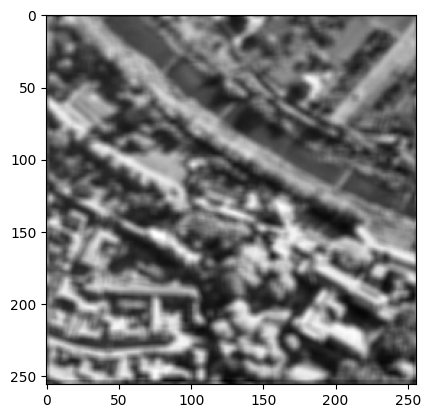

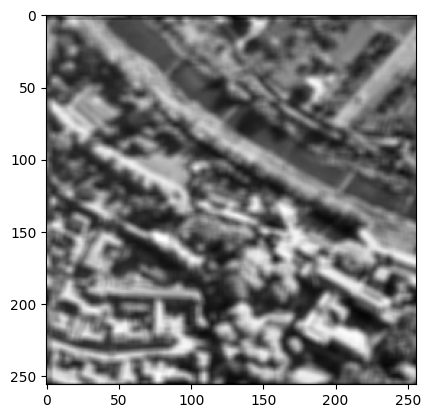

(256, 256)
(256, 256)
True


In [69]:
import numpy as np
import cv2

def circular_convolution(image, kernel):
    # Get dimensions of the image and the kernel
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Pad the image to handle boundary effects
    padded_image = np.pad(image, ((kernel_height // 2, kernel_height // 2),
                                   (kernel_width // 2, kernel_width // 2)), mode='wrap')

    # Initialize the result matrix
    result = np.zeros_like(image, dtype=np.float64)

    # Perform circular convolution
    for y in range(image_height):
        for x in range(image_width):
            # Define the region of interest
            roi = padded_image[y:y + kernel_height, x:x + kernel_width]
            # Apply convolution
            result[y, x] = np.sum(roi * kernel)

    # Normalize the result
#     result = (result - np.min(result)) / (np.max(result) - np.min(result)) * 255

    return result.astype(np.uint8)


# Read the image
image = aerial

# Define the averaging filter of size 5x5
kernel_size = 5
averaging_filter = np.ones((kernel_size, kernel_size), dtype=np.float64) / (kernel_size * kernel_size)

# Perform circular convolution
convolved_image = circular_convolution(image, averaging_filter)

# Display the original and convolved images
plt.imshow(image, cmap='gray')
plt.show()
plt.imshow(convolved_image, cmap = 'gray')
plt.show()
plt.imshow(result, cmap = 'gray')
plt.show()
print(convolved_image.shape)
print(result.shape)
print(np.all(np.abs(result - convolved_image) < 100))

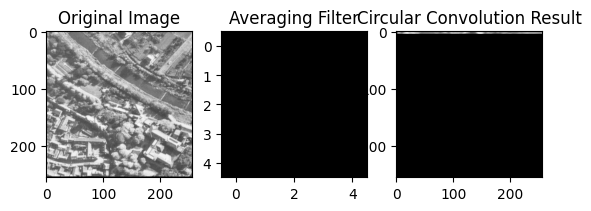

In [26]:
def dft1d(x):
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    return np.dot(e, x)

def idft1d(X):
    N = len(X)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(2j * np.pi * k * n / N)
    return np.dot(e, X) / N

def dft2d(image):
    rows, cols = image.shape
    return np.array([dft1d(image[row, :]) for row in range(rows)])

def idft2d(X):
    rows, cols = X.shape
    return np.array([idft1d(X[row, :]) for row in range(rows)])

def circular_convolution(image, kernel):
    image_padded = np.pad(image, [(0, kernel.shape[0]-1), (0, kernel.shape[1]-1)], mode='constant')
    kernel_padded = np.pad(kernel, [(0, image.shape[0]-1), (0, image.shape[1]-1)], mode='constant')
    image_fft = dft2d(image_padded)
    kernel_fft = dft2d(kernel_padded)
    result_fft = image_fft * kernel_fft
    result = idft2d(result_fft).real
    result = result[:image.shape[0], :image.shape[1]]

    return result
image = aerial

filter_size = 5
averaging_filter = np.ones((filter_size, filter_size)) / (filter_size**2)

convolution_result = circular_convolution(image, averaging_filter)

# Display the original image, filter, and the result of circular convolution
plt.subplot(131), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(132), plt.imshow(averaging_filter, cmap='gray'), plt.title('Averaging Filter')
plt.subplot(133), plt.imshow(convolution_result, cmap='gray'), plt.title('Circular Convolution Result')
plt.show()


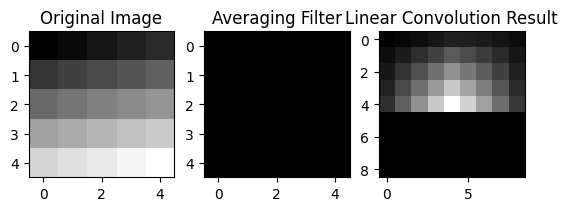

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def linear_convolution(image, kernel):
    # Calculate the size for zero-padding
    padded_size = image.shape[0] + kernel.shape[0] - 1

    # Zero-pad the images to the appropriate size
    image_padded = np.pad(image, [(0, padded_size - image.shape[0]), (0, padded_size - image.shape[1])], mode='constant')
    kernel_padded = np.pad(kernel, [(0, padded_size - kernel.shape[0]), (0, padded_size - kernel.shape[1])], mode='constant')

    # Use circular convolution function on zero-padded images
    result = circular_convolution(image_padded, kernel_padded)

    return result

# Test the linear convolution with the same image and a 5x5 averaging filter
linear_convolution_result = linear_convolution(image, averaging_filter)

# Display the original image, filter, and the result of linear convolution using circular convolution
plt.subplot(131), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(132), plt.imshow(averaging_filter, cmap='gray'), plt.title('Averaging Filter')
plt.subplot(133), plt.imshow(linear_convolution_result, cmap='gray'), plt.title('Linear Convolution Result')
plt.show()


In [10]:
import numpy as np
import time

def circular_convolution(image, kernel):
    # Pad the images to avoid boundary effects
    image_padded = np.pad(image, [(0, kernel.shape[0]-1), (0, kernel.shape[1]-1)], mode='constant')
    kernel_padded = np.pad(kernel, [(0, image.shape[0]-1), (0, image.shape[1]-1)], mode='constant')

    # Compute the 2D Fourier Transforms
    image_fft = np.fft.fft2(image_padded)
    kernel_fft = np.fft.fft2(kernel_padded)

    # Multiply the Fourier Transforms
    result_fft = image_fft * kernel_fft

    # Compute the Inverse Fourier Transform
    result = np.fft.ifft2(result_fft).real

    # Crop the result to the original size
    result = result[:image.shape[0], :image.shape[1]]

    return result

# Generate a random image for testing
image_size = 100
image = np.random.rand(image_size, image_size)

# Test different filter kernel sizes
kernel_sizes = [3, 5, 7, 9, 11]

for kernel_size in kernel_sizes:
    filter_kernel = np.ones((kernel_size, kernel_size)) / (kernel_size**2)

    # Direct linear convolution
    start_time_direct = time.time()
    convolved_result_direct = np.convolve(image.flatten(), filter_kernel.flatten(), mode='full')
    result_size_direct = image_size + kernel_size - 1
    result_direct = convolved_result_direct[:result_size_direct**2].reshape((result_size_direct, result_size_direct))
    result_direct = result_direct[:image_size, :image_size]  # Crop to the original size
    time_direct = time.time() - start_time_direct

    # IDFT-DFT approach with zero padding
    start_time_fft = time.time()
    result_fft = circular_convolution(image, filter_kernel)
    time_fft = time.time() - start_time_fft

    print(f"Kernel Size: {kernel_size}x{kernel_size}")
    print(f"Direct Linear Convolution Time: {time_direct:.6f} seconds")
    print(f"IDFT-DFT Approach Time: {time_fft:.6f} seconds\n")


ValueError: cannot reshape array of size 10008 into shape (102,102)

# 2

Averaging Filter Size: 3x3


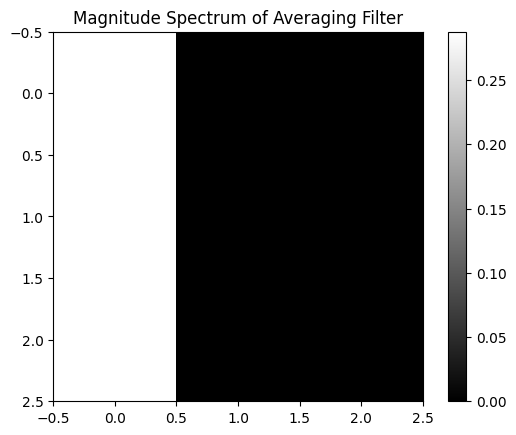

Averaging Filter Size: 5x5


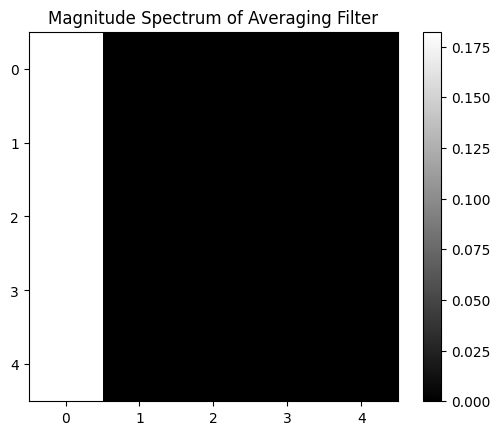

Averaging Filter Size: 7x7


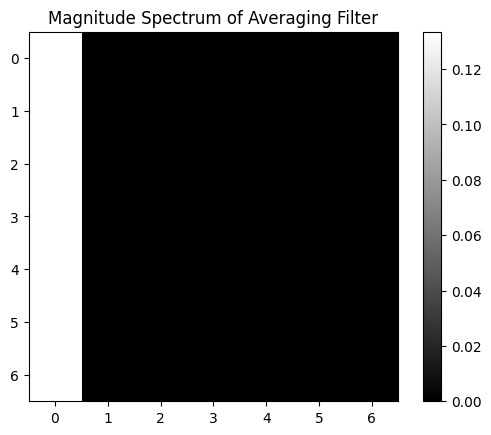

Averaging Filter Size: 9x9


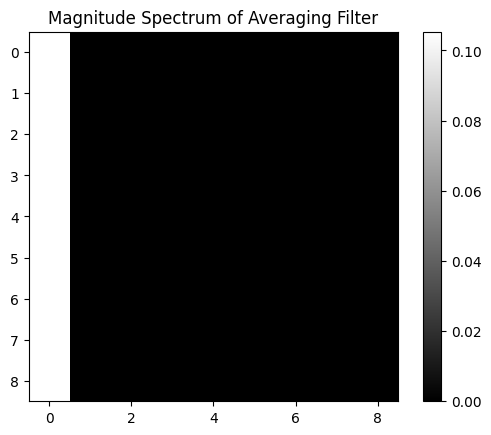

Averaging Filter Size: 11x11


In [13]:
import numpy as np
import matplotlib.pyplot as plt

def dft1d(x):
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    return np.dot(e, x)

def idft1d(X):
    N = len(X)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(2j * np.pi * k * n / N)
    return np.dot(e, X) / N

def dft2d(image):
    rows, cols = image.shape
    return np.array([dft1d(image[row, :]) for row in range(rows)])

def idft2d(X):
    rows, cols = X.shape
    return np.array([idft1d(X[row, :]) for row in range(rows)])

def plot_spectrum(filter_kernel):
    # Compute the 2D Fourier Transform
    filter_fft = dft2d(filter_kernel)

    # Compute magnitude spectrum (logarithmic scale for better visualization)
    magnitude_spectrum = np.log(np.abs(filter_fft) + 1)

    # Plot the magnitude spectrum
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title('Magnitude Spectrum of Averaging Filter')
    plt.colorbar()
    plt.show()

# Experiment with different averaging filter kernel sizes
kernel_sizes = [3, 5, 7, 9, 11]

for size in kernel_sizes:
    averaging_filter = np.ones((size, size)) / (size**2)
    print(f"Averaging Filter Size: {size}x{size}")
    plot_spectrum(averaging_filter)


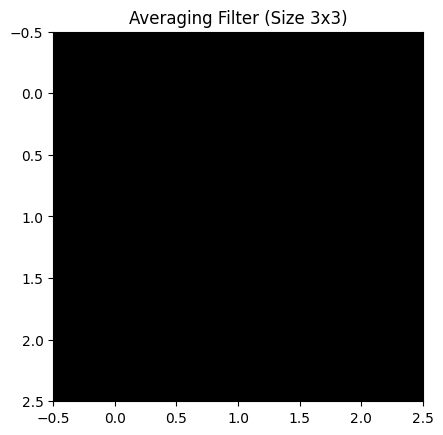

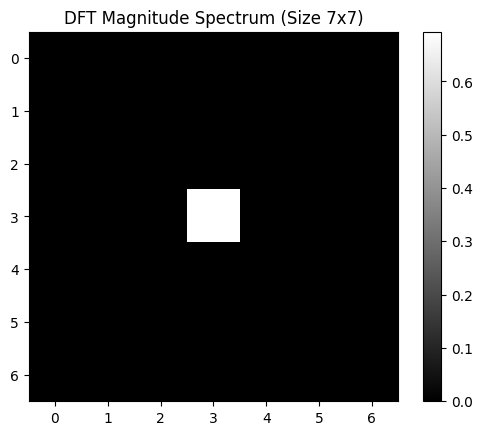

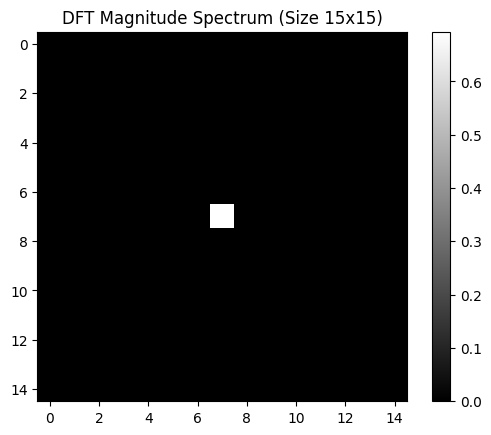

In [70]:
import numpy as np
import matplotlib.pyplot as plt

def generate_averaging_filter(N):
    # Generate an NxN averaging filter kernel
    return np.ones((N, N), dtype=np.float32) / (N * N)

def plot_dft_magnitude_spectrum(signal, title):
    # Compute the 2D Discrete Fourier Transform
    dft = np.fft.fft2(signal)
    
    # Shift zero frequency components to the center
    dft_shifted = np.fft.fftshift(dft)
    
    # Compute the magnitude spectrum
    magnitude_spectrum = np.abs(dft_shifted)
    
    # Plot the magnitude spectrum
    plt.imshow(np.log(1 + magnitude_spectrum), cmap='gray')
    plt.title(title)
    plt.colorbar()
    plt.show()

# Experiment with different filter parameters
filter_sizes = [3, 7, 15]  # Try different sizes

for size in filter_sizes:
    # Generate the averaging filter kernel
    averaging_filter = generate_averaging_filter(size)
    
    # Plot the averaging filter
    plt.imshow(averaging_filter, cmap='gray')
    plt.title(f'Averaging Filter (Size {size}x{size})')
    plt.show()
    
    # Plot the DFT magnitude spectrum of the filter
    plot_dft_magnitude_spectrum(averaging_filter, f'DFT Magnitude Spectrum (Size {size}x{size})')


Gaussian Filter Parameter (Sigma): 1


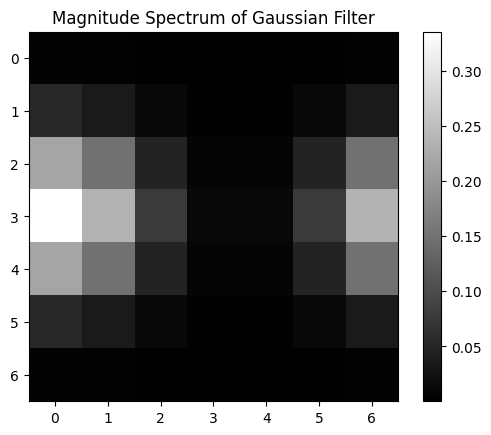

Gaussian Filter Parameter (Sigma): 2


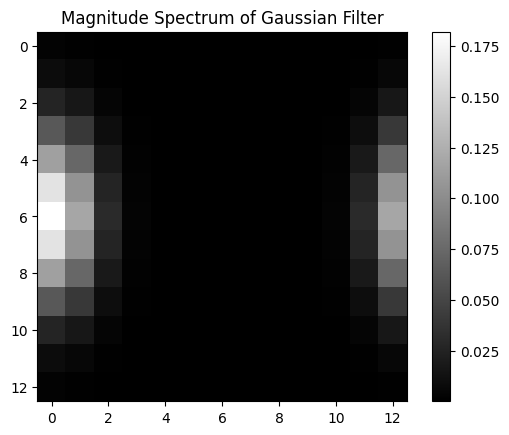

Gaussian Filter Parameter (Sigma): 3


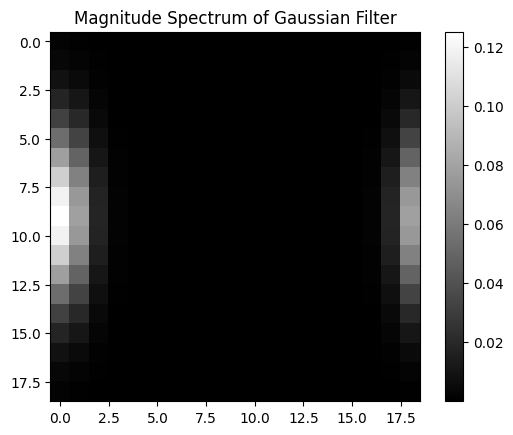

Gaussian Filter Parameter (Sigma): 4


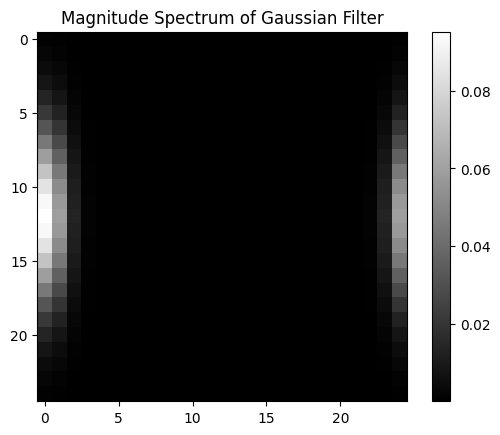

Gaussian Filter Parameter (Sigma): 5


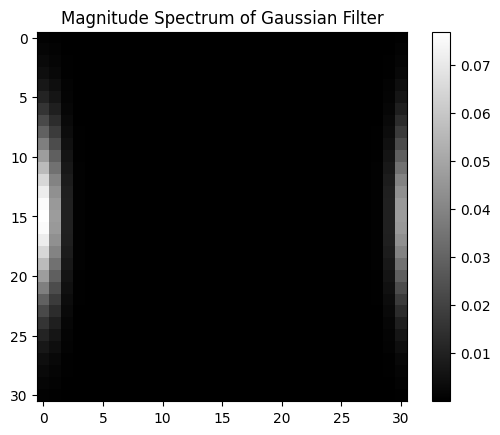

In [15]:
def gaussian_filter(size, sigma):
    """Generate a Gaussian filter kernel."""
    x, y = np.meshgrid(np.arange(-size//2 + 1, size//2 + 1), np.arange(-size//2 + 1, size//2 + 1))
    kernel = np.exp(-(x**2 + y**2) / (2 * sigma**2))
    return kernel / np.sum(kernel)

def plot_spectrum(filter_kernel):
    # Compute the 2D Fourier Transform
    filter_fft = dft2d(filter_kernel)

    # Compute magnitude spectrum (logarithmic scale for better visualization)
    magnitude_spectrum = np.log(np.abs(filter_fft) + 1)

    # Plot the magnitude spectrum
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title('Magnitude Spectrum of Gaussian Filter')
    plt.colorbar()
    plt.show()

# Experiment with different Gaussian filter standard deviation values
sigma_values = [1, 2, 3, 4, 5]

for sigma in sigma_values:
    filter_size = int(6 * sigma) + 1  # Empirical rule for filter size based on standard deviation
    gaussian_kernel = gaussian_filter(filter_size, sigma)
    print(f"Gaussian Filter Parameter (Sigma): {sigma}")
    plot_spectrum(gaussian_kernel)

Bandpass Filter Parameters: Sigma_low = 1, Sigma_high = 5


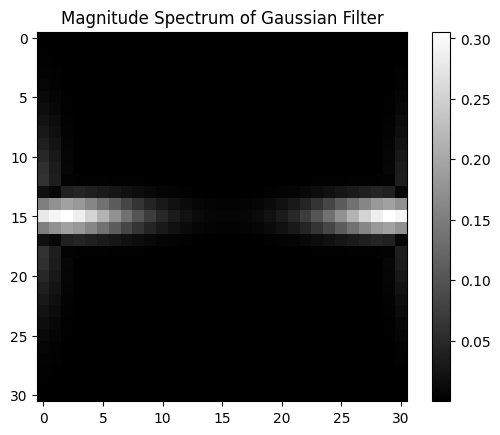

Bandpass Filter Parameters: Sigma_low = 1, Sigma_high = 7


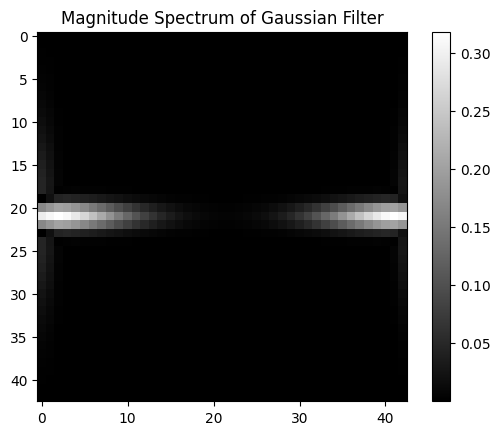

Bandpass Filter Parameters: Sigma_low = 1, Sigma_high = 9


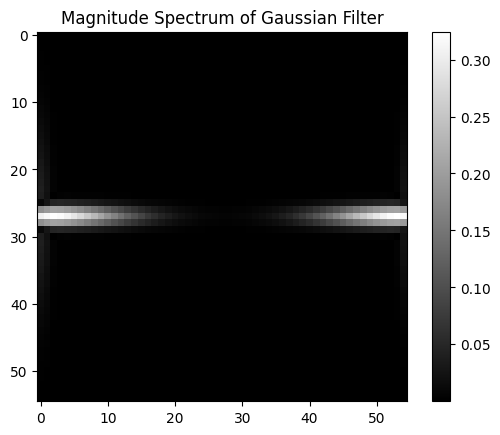

Bandpass Filter Parameters: Sigma_low = 2, Sigma_high = 5


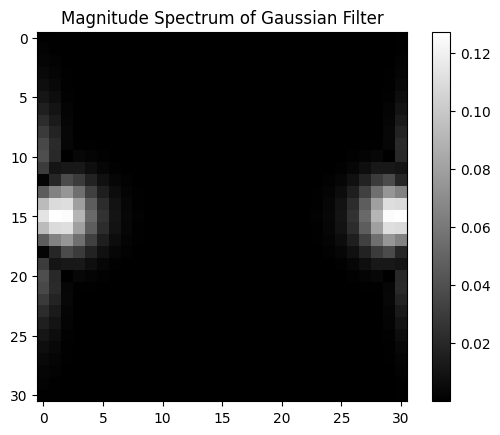

Bandpass Filter Parameters: Sigma_low = 2, Sigma_high = 7


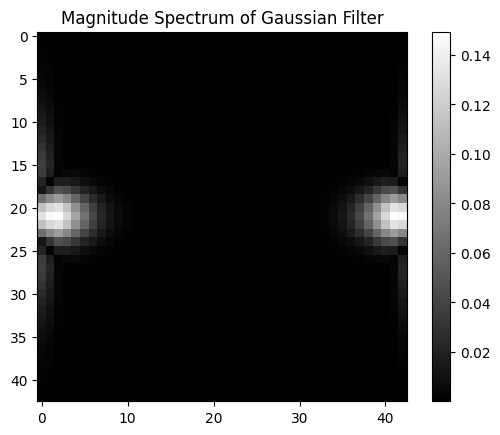

Bandpass Filter Parameters: Sigma_low = 2, Sigma_high = 9


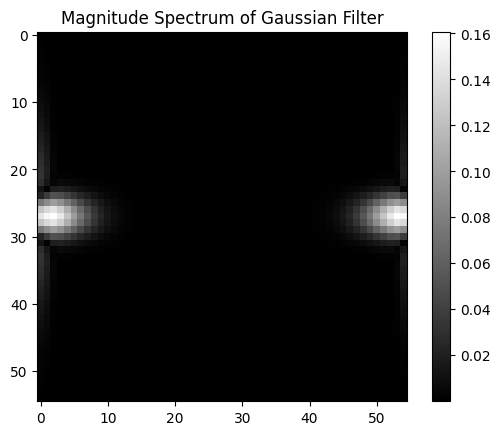

Bandpass Filter Parameters: Sigma_low = 3, Sigma_high = 5


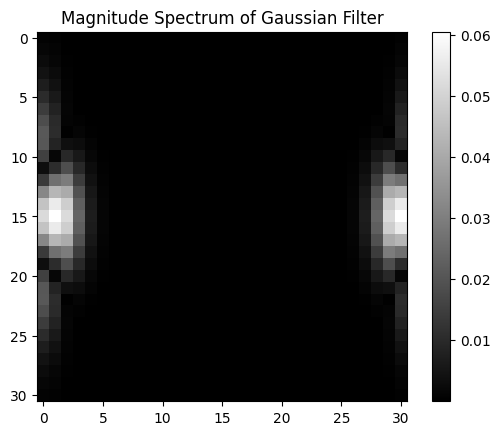

Bandpass Filter Parameters: Sigma_low = 3, Sigma_high = 7


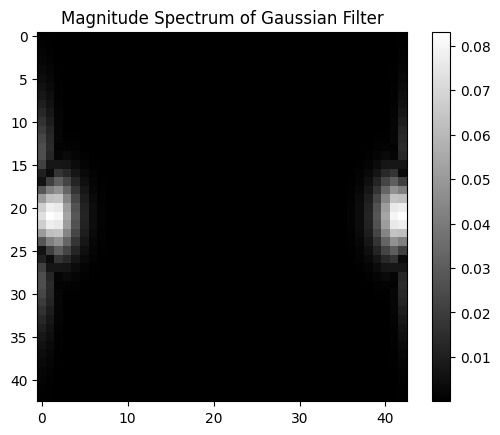

Bandpass Filter Parameters: Sigma_low = 3, Sigma_high = 9


In [17]:
def bandpass_filter(size, sigma_low, sigma_high):
    gaussian_low = gaussian_filter(size, sigma_low)
    gaussian_high = gaussian_filter(size, sigma_high)
    return gaussian_high - gaussian_low

# Experiment with different parameters for the individual Gaussians
sigma_low = 1
sigma_high = 4
filter_size = int(6 * sigma_high) + 1  # Empirical rule for filter size based on standard deviation
# Experiment with various parameters for the individual Gaussians
sigma_low_values = [1, 2, 3]
sigma_high_values = [5, 7, 9]

for sigma_low in sigma_low_values:
    for sigma_high in sigma_high_values:
        filter_size = int(6 * sigma_high) + 1  # Empirical rule for filter size based on standard deviation

        bandpass_filter_kernel = bandpass_filter(filter_size, sigma_low, sigma_high)
        print(f"Bandpass Filter Parameters: Sigma_low = {sigma_low}, Sigma_high = {sigma_high}")
        plot_spectrum(bandpass_filter_kernel)


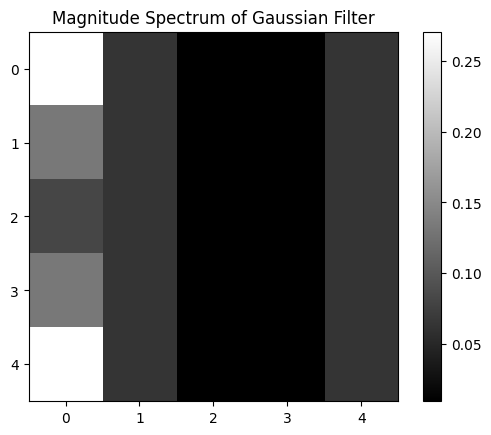

In [18]:
def laplacian_filter(size):
    """Generate a Laplacian filter kernel."""
    x, y = np.meshgrid(np.arange(-size//2 + 1, size//2 + 1), np.arange(-size//2 + 1, size//2 + 1))
    kernel = -4 * (x**2 + y**2) + 2
    return kernel / np.sum(np.abs(kernel))
filter_size = 5
laplacian_filter_kernel = laplacian_filter(filter_size)

# Plot the DFT magnitude spectrum
plot_spectrum(laplacian_filter_kernel)

# 3

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def add_gaussian_noise(image, sigma):
    """Add Gaussian noise to the image."""
    noise = np.random.normal(0, sigma, image.shape)
    noisy_image = np.clip(image + noise, 0, 255).astype(np.uint8)
    return noisy_image

def add_random_noise(image, noise_level):
    """Add random noise to the image."""
    noise = np.random.uniform(-noise_level, noise_level, image.shape)
    noisy_image = np.clip(image + noise, 0, 1)
    return noisy_image

def denoise_average_filter(image, window_size):
    """Denoise the image using an average filter with a specified window size."""
    rows, cols = image.shape
    denoised_image = np.zeros_like(image)

    for i in range(rows):
        for j in range(cols):
            pixel_sum = 0
            count = 0

            for m in range(max(0, i - window_size//2), min(rows, i + window_size//2 + 1)):
                for n in range(max(0, j - window_size//2), min(cols, j + window_size//2 + 1)):
                    pixel_sum += image[m, n]
                    count += 1

            denoised_image[i, j] = pixel_sum // count

    return denoised_image

def plot_images(images, titles):
    """Plot multiple images with corresponding titles."""
    num_images = len(images)
    plt.figure(figsize=(15, 5))

    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])

    plt.show()

# Generate a random image (replace 'size' with the desired size)
image_size = (256, 256)
random_image = np.random.randint(0, 256, size=image_size, dtype=np.uint8)

# Add Gaussian noise to the random image with variance σ^2 = 25
sigma = np.sqrt(25)
noisy_image_gaussian = add_gaussian_noise(random_image, sigma)

# Add random noise to the random image with a noise level of 0.1
noise_level = 0.1
noisy_image_random = add_random_noise(random_image / 255.0, noise_level)  # Normalize to [0, 1]

# Vary window size from 3 to 15 in increments of 2
window_sizes = list(range(3, 16, 2))

# Denoise the images using an average filter for different window sizes
denoised_images = [denoise_average_filter(noisy_image_gaussian / 255.0, size) for size in window_sizes]  # Normalize to [0, 1]

# Plot the original, noisy, and denoised images
plot_images([random_image, noisy_image_random * 255, noisy_image_gaussian, *denoised_images],
            ['Random Image', f'Noisy Image (Random, σ={noise_level})', f'Noisy Image (Gaussian, σ={sigma})'] +
            [f'Denoised (M={size})' for size in window_sizes])


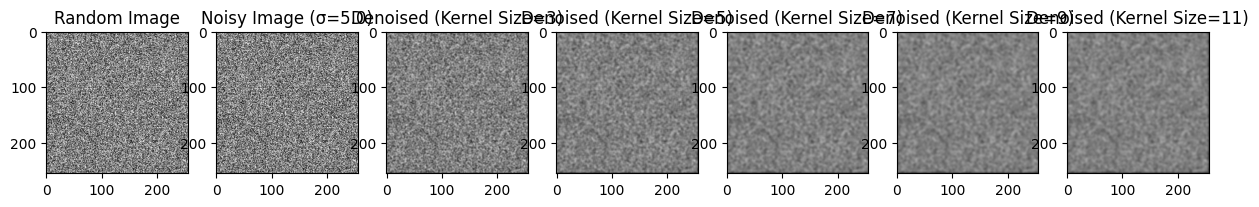

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def add_gaussian_noise(image, sigma):
    """Add Gaussian noise to the image."""
    noise = np.random.normal(0, sigma, image.shape)
    noisy_image = np.clip(image + noise, 0, 255).astype(np.uint8)
    return noisy_image

def convolve(image, kernel):
    """Perform convolution between the image and kernel."""
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    padded_image = np.pad(image, ((kernel_height//2, kernel_height//2), (kernel_width//2, kernel_width//2)), mode='constant')

    result = np.zeros_like(image, dtype=float)

    for i in range(image_height):
        for j in range(image_width):
            result[i, j] = np.sum(padded_image[i:i+kernel_height, j:j+kernel_width] * kernel)

    return result.astype(np.uint8)

def gaussian_kernel(size, sigma):
    """Generate a Gaussian kernel."""
    kernel = np.fromfunction(
        lambda x, y: (1/ (2 * np.pi * sigma**2)) * np.exp(-((x - (size-1)/2)**2 + (y - (size-1)/2)**2) / (2 * sigma**2)),
        (size, size)
    )
    return kernel / np.sum(kernel)

def denoise_gaussian_filter(image, sigma_h, kernel_size):
    """Denoise the image using a custom Gaussian filter with a specified standard deviation and kernel size."""
    kernel = gaussian_kernel(kernel_size, sigma_h)
    return convolve(image, kernel)

def plot_images(images, titles):
    """Plot multiple images with corresponding titles."""
    num_images = len(images)
    plt.figure(figsize=(15, 5))

    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[i], cmap='gray', vmin=0, vmax=255)  # Adjust vmin and vmax if needed
        plt.title(titles[i])

    plt.show()

# Generate a random image (replace 'size' with the desired size)
image_size = (256, 256)
random_image = np.random.randint(0, 256, size=image_size, dtype=np.uint8)

# Add Gaussian noise to the random image with variance σ^2 = 25
sigma_noise = np.sqrt(25)
noisy_image = add_gaussian_noise(random_image, sigma_noise)

# Vary standard deviation σh from 0.5 to 5 in steps of 0.5
sigma_values = np.arange(0.5, 5.5, 0.5)
kernel_size = 5  # Keep kernel size constant

denoised_images_sigma = [denoise_gaussian_filter(noisy_image, sigma, kernel_size) for sigma in sigma_values]

# Keep the standard deviation constant (e.g., σh = 2) and vary the kernel size
constant_sigma = 2.0
kernel_sizes = [3, 5, 7, 9, 11]
denoised_images_kernel = [denoise_gaussian_filter(noisy_image, constant_sigma, size) for size in kernel_sizes]

# Plot the original, noisy, and denoised images for varying σh
plot_images([random_image, noisy_image, *denoised_images_sigma],
            ['Random Image', f'Noisy Image (σ={sigma_noise})'] +
            [f'Denoised (σh={sigma})' for sigma in sigma_values])

# Plot the original, noisy, and denoised images for varying kernel sizes
plot_images([random_image, noisy_image, *denoised_images_kernel],
            ['Random Image', f'Noisy Image (σ={sigma_noise})'] +
            [f'Denoised (Kernel Size={size})' for size in kernel_sizes])


Image Shape: (256, 256)


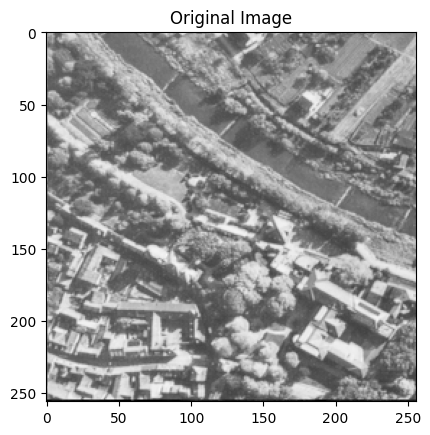

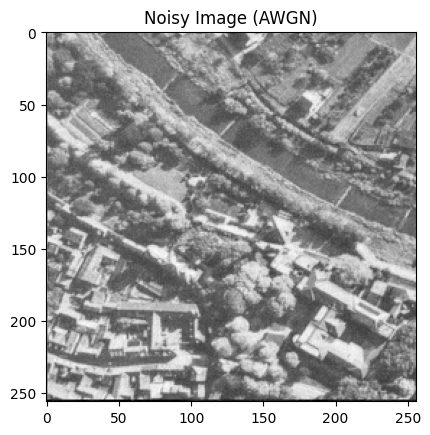

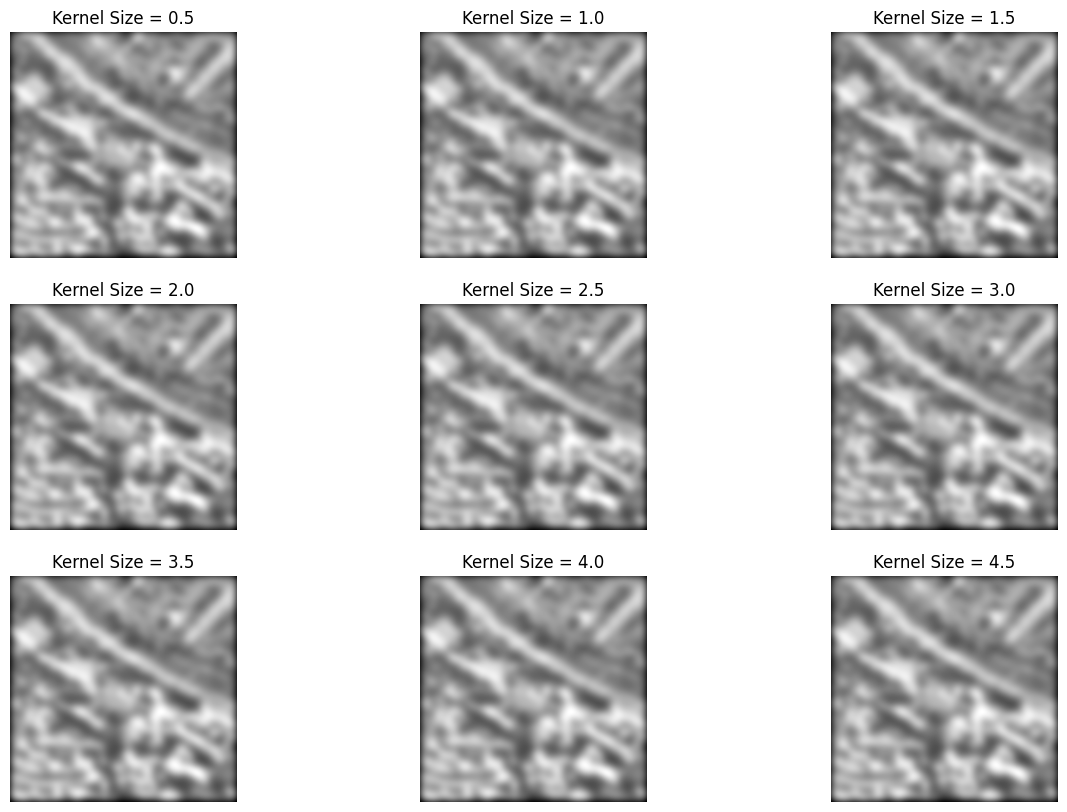

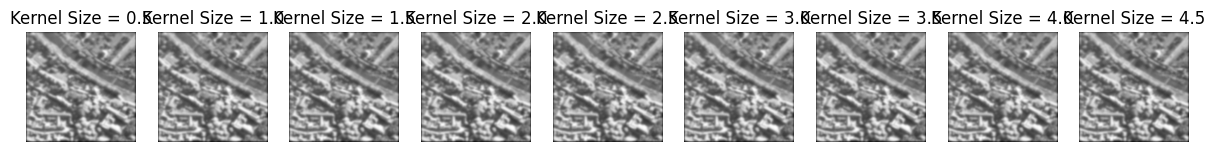

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the grayscale image
image= aerial

# Add additive white Gaussian noise with zero mean and variance σ^2 = 25
sigma = np.sqrt(25)
noise = np.random.normal(0, sigma, size=image.shape)
noisy_image = np.clip(image + noise, 0, 255)  # Clip to [0, 255] for display

print("Image Shape:", noisy_image.shape)

def gaussian_filter(image, sigma, kernel_size):
    height, width = image.shape
    x, y = np.meshgrid(np.arange(-width//2, width//2), np.arange(-height//2, height//2))
    kernel = np.exp(-(x**2 + y**2) / (2 * sigma**2)) / (2 * np.pi * sigma**2)
    kernel = kernel / np.sum(kernel)  # Normalize the kernel

    # Apply 2D convolution without padding
    filtered_image = np.zeros_like(image)
    for i in range(height):
        for j in range(width):
            i_start, i_end = max(0, i - height//2), min(height, i + height//2)
            j_start, j_end = max(0, j - width//2), min(width, j + width//2)

            region = image[i_start:i_end, j_start:j_end]
            filtered_image[i, j] = np.sum(region * kernel[i_start - i + height//2:i_end - i + height//2, j_start - j + width//2:j_end - j + width//2])

    return filtered_image

# Vary kernel size from 0.5 to 5 in increments of 0.5
kernel_sizes = np.arange(0.5, 5, 0.5)

# Plot the original and noisy images
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.title('Original Image')
plt.show()

plt.imshow(noisy_image, cmap='gray', vmin=0, vmax=255)
plt.title('Noisy Image (AWGN)')
plt.show()

# Denoising with varying kernel sizes
plt.figure(figsize=(15, 10))
for kernel_size in kernel_sizes:
    denoised_image = gaussian_filter(noisy_image, sigma, kernel_size)
    plt.subplot(3, 3, int(kernel_size * 2))
    plt.imshow(denoised_image, cmap='gray')
    plt.title(f'Kernel Size = {kernel_size}')
    plt.axis('off')

plt.show()

# Keeping standard deviation constant and varying kernel size
constant_sigma = 2
plt.figure(figsize=(15, 5))
for kernel_size in kernel_sizes:
    denoised_image = gaussian_filter(noisy_image, constant_sigma, kernel_size)
    plt.subplot(1, 9, int(kernel_size * 2))
    plt.imshow(denoised_image, cmap='gray')
    plt.title(f'Kernel Size = {kernel_size}')
    plt.axis('off')

plt.show()
